. 

<font size=7>Opto Streamer Code

In this notebook we create the first dry run of a closed loop maxwell/opto system.

set up notebook

In [1]:
import MaxwellGI as mgi

In [2]:
import time

<font color="red">
    
**To Do**
* Build function checking USB devices
* Calibration (get distribution of firing rates)
* turn into a function where person set window time and results is an array of binned spikes.
* ignore first spike count
* look into glitch of high spike count near onset of initializtion for spike counter
* Set up system for recording multiple files and specifying which one's have action in them
* Kate ask to turn of print messages
* Create gui for john andrews

# <font color=red>Turn this into a calibration function

<font color="red">

* set spike counter window
* set how long it should run for

In [ ]:
### Set up Maxwell and Opto
maxwell = mgi.MaxwellCtl( config="/home/mxwbio/work/seizure_closed_loop/files/maxwell/configs/2023_03_31_opto_test.cfg")              # Turn Maxwell On
stream  = mgi.Streamer( maxwell, filtered=False )                                                                       # Start Livestream
#opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/opto_test", 
#                   calibration_file="./files/opto/calibrations/20230203T152939-ucsf-opto-system-a_real-625nm-1a-v1.csv", arduino_path="/dev/ttyACM11")       # Set up Opto
#maxwell.recordingStart( data_file="/home/mxwbio/work/seizure_closed_loop/files/maxwell/recordings/2023_03_31_chip16753_optotest.h5")   # Start recording data             




# Define Closed Loop Experiment
print("Starting closed loop")
last_opto = 0
experiment_end = time.time() + 50                                    # End the experiment in 20 seconds
first_time = True
spike_counts = []
while time.time() < experiment_end:                                  # while the experiment hasn't run for 20 seconds
    count_time = time.time() + .5                                     # Count spikes over 1 second window
    spike_count = 0                                                  # continually add new spikes to spike_count
    while time.time() < count_time:                                  # while still in 1 second window
        frameID, voltages, spikes = stream.getData()                 # get spikes data
        for spike in spikes:                                         # if there's a spike add it to the spike_count
            spike_count += 1
    print("Spike Count: ", spike_count )    
    if not first_time:
        spike_counts.append(spike_count)
    first_time = False

    
print("experiment finished")    



# Shut Down Experiment
print("shutting down devices")
del stream                # Stop Stream
#opto_ctl.close()          # Stop Opto
#maxwell.recordingStop()  # stop recording
print("done")

In [ ]:
import matplotlib.pyplot as plt


plt.hist(spike_counts, bins='auto')  # arguments are passed to np.histogram
plt.show()

<font color="red"> Provide some summary statistics output as well. Save results to some location.
    


# <font color="red">Run Experiment

<font color="red">

* set spike counter window
* set how long it should run for

This will turn into it's own python file

In [ ]:
### Set up Maxwell and Opto
maxwell = mgi.MaxwellCtl( config="/home/mxwbio/work/seizure_closed_loop/files/maxwell/configs/2023_04_02_hc328.cfg")              # Turn Maxwell On
stream  = mgi.Streamer( maxwell, filtered=False )                                                                       # Start Livestream
opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/sury_test", 
                   calibration_file="./files/opto/calibrations/20230203T152939-ucsf-opto-system-a_real-625nm-1a-v1.csv", arduino_path="/dev/ttyACM11")       # Set up Opto
maxwell.recordingStart( data_file="/home/mxwbio/work/seizure_closed_loop/files/maxwell/recordings/2023_03_31_chip16753_SuryTest.h5")   # Start recording data             




# Define Closed Loop Experiment
print("Starting closed loop")
last_opto = 0
experiment_end = time.time() + 120                                    # End the experiment in 20 seconds
first_time = True
spike_counts = []
while time.time() < experiment_end:                                  # while the experiment hasn't run for 20 seconds
    count_time = time.time() + .5                                     # Count spikes over 1 second window
    spike_count = 0                                                  # continually add new spikes to spike_count
    while time.time() < count_time:                                  # while still in 1 second window
        frameID, voltages, spikes = stream.getData()                 # get spikes data
        for spike in spikes:                                         # if there's a spike add it to the spike_count
            spike_count += 1
    print("Spike Count: ", spike_count )    
    if not first_time:
        spike_counts.append(spike_count)
    

    if spike_count > 19 and time.time()>last_opto+15 and not first_time:                # If tehre are more than 10 spikes in a second
        print("Starting Opto Pulses")                                # Do some opto pulses
        opto_ctl.pulses(  on_duration=25, off_duration=25, num_pulses=100, intensity=.9 )
        # on long pulse: 
        #opto_ctl.pulses(  on_duration=3000, off_duration=200, num_pulses=2, intensity=.2 )
        
        print("finished pulses")
        #print("emptying artifact spikes")
        last_opto = time.time()
        #empty_time = time.time()+10                                  # wait 10 second to empty out previous data from stream
        #while time.time() < empty_time:
        #    stream.getData()                                         # Empty out stream data, because pulses created many fake spikes
        #print("finished emptying")    
    first_time = False
    
print("experiment finished")    



# Shut Down Experiment
print("shutting down devices")
del stream                # Stop Stream
opto_ctl.close()          # Stop Opto
maxwell.recordingStop()  # stop recording
print("done")

# <font color="green"> Experiment: Opto Light and Recording

In [4]:
maxwell = mgi.MaxwellCtl( config="/home/mxwbio/work/seizure_closed_loop/files/maxwell/configs/2023_04_04_hc328_hckcr1-2.cfg")              # Turn Maxwell On
opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/2023_04_04_hc328_hckcr1-2_1", 
                   calibration_file="./files/opto/calibrations/20230308T140514-ucsf-opto-system-b_real-530nm-1a-v1.csv", arduino_path="/dev/ttyACM11")       # Set up Opto
maxwell.recordingStart( data_file="/home/mxwbio/work/seizure_closed_loop/files/maxwell/recordings/2023_04_04_hc328_hckcr1-2_1.h5")   # Start recording data             

print("Starting experiments")
time.sleep(10)
print("Light On")
opto_ctl.pulses(  on_duration=10000, off_duration=200, num_pulses=1, intensity=.5)
print("Light Off")
time.sleep(40)

# Shut Down Experiment
print("shutting down devices")
opto_ctl.close()          # Stop Opto
maxwell.recordingStop()  # stop recording
print("done")

MaxOne initialized
Available USB devices:
('ASRL/dev/ttyACM11::INSTR',)
recording_filename 20230404T170845-2023_04_04_hc328_hckcr1-2_1
stim_log_file: ./files/opto/logs/20230404T170845-2023_04_04_hc328_hckcr1-2_1_opto_stim_log.csv
CSV file is 0
Recording Started
Starting experiments
Light On
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.5 	 delay/on/off (frames): 0 / 200000 / 4000
Light Off
shutting down devices
Recording finished
done


**Experiments run**
* 2023_04_02_hc328_0: single pules 5s length, 3s into experiment
* 2023_04_02_hc328_1: single pulse 10s length, 10s into experiment
* 2023_04_02_hc328_2: same as 1
* 2023_04_02_hc328_3: same as 1
* 2023_04_02_hc328_4: same as 1
* 2023_04_02_hc328_5: same as 1, but longer recording after light stim

# <font color="green"> Experiment: Get firing rate

In [10]:
### Set up Maxwell and Opto
maxwell = mgi.MaxwellCtl( config="/home/mxwbio/work/seizure_closed_loop/files/maxwell/configs/2023_04_04_hc328_hckcr1-2.cfg")              # Turn Maxwell On
stream  = mgi.Streamer( maxwell, filtered=False )                                                                       # Start Livestream
#opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/opto_test", 
#                   calibration_file="./files/opto/calibrations/20230203T152939-ucsf-opto-system-a_real-625nm-1a-v1.csv", arduino_path="/dev/ttyACM11")       # Set up Opto
#maxwell.recordingStart( data_file="/home/mxwbio/work/seizure_closed_loop/files/maxwell/recordings/2023_03_31_chip16753_optotest.h5")   # Start recording data             




# Define Closed Loop Experiment
print("Starting closed loop")
last_opto = 0
experiment_end = time.time() + 40                                    # End the experiment in 20 seconds
first_time = True
spike_counts = []
while time.time() < experiment_end:                                  # while the experiment hasn't run for 20 seconds
    count_time = time.time() + 10                                     # Count spikes over 1 second window
    spike_count = 0                                                  # continually add new spikes to spike_count
    while time.time() < count_time:                                  # while still in 1 second window
        frameID, voltages, spikes = stream.getData()                 # get spikes data
        for spike in spikes:                                         # if there's a spike add it to the spike_count
            spike_count += 1
    print("Spike Count: ", spike_count )    
    if not first_time:
        spike_counts.append(spike_count)
    first_time = False

    
print("experiment finished")    



# Shut Down Experiment
print("shutting down devices")
del stream                # Stop Stream
#opto_ctl.close()          # Stop Opto
#maxwell.recordingStop()  # stop recording
print("done")

MaxOne initialized
maxwell streamer ready
Starting closed loop
Spike Count:  88
Spike Count:  108
Spike Count:  80
Spike Count:  64
experiment finished
shutting down devices
done


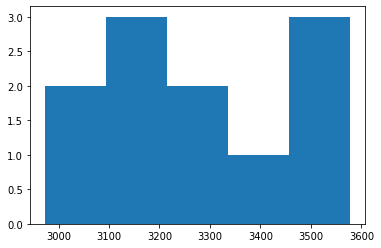

In [6]:
import matplotlib.pyplot as plt
plt.hist(spike_counts, bins='auto')  # arguments are passed to np.histogram
plt.show()

# <font color="green"> Experiment: Closed loop test

In [9]:
### Set up Maxwell and Opto
maxwell = mgi.MaxwellCtl( config="/home/mxwbio/work/seizure_closed_loop/files/maxwell/configs/2023_04_04_hc328_hckcr1-2.cfg")              # Turn Maxwell On
stream  = mgi.Streamer( maxwell, filtered=False ) 
opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/2023_04_04_hc328_hckcr1-2_4", 
                   calibration_file="./files/opto/calibrations/20230308T140514-ucsf-opto-system-b_real-530nm-1a-v1.csv", arduino_path="/dev/ttyACM11")       # Set up Opto
maxwell.recordingStart( data_file="/home/mxwbio/work/seizure_closed_loop/files/maxwell/recordings/2023_04_04_hc328_hckcr1-2_4.h5")   # Start recording data             



# Define Closed Loop Experiment
print("Starting closed loop")
last_opto = 0
experiment_end = time.time() + 300                                    # End the experiment in 20 seconds
first_time = True
spike_counts = []
while time.time() < experiment_end:                                  # while the experiment hasn't run for 20 seconds
    count_time = time.time() + 10                                     # Count spikes over 1 second window
    spike_count = 0                                                  # continually add new spikes to spike_count
    while time.time() < count_time:                                  # while still in 1 second window
        frameID, voltages, spikes = stream.getData()                 # get spikes data
        for spike in spikes:                                         # if there's a spike add it to the spike_count
            spike_count += 1
    print("Spike Count: ", spike_count )    
    if not first_time:
        spike_counts.append(spike_count)
    

    if spike_count > 5500 and time.time()>last_opto+15 and not first_time:                # If tehre are more than 10 spikes in a second
        print("Starting Opto Pulses")                                # Do some opto pulses
        opto_ctl.pulses(  on_duration=10000, off_duration=200, num_pulses=1, intensity=.5)
        # on long pulse: 
        #opto_ctl.pulses(  on_duration=3000, off_duration=200, num_pulses=2, intensity=.2 )
        
        print("finished pulses")
        #print("emptying artifact spikes")
        last_opto = time.time()
        #empty_time = time.time()+10                                  # wait 10 second to empty out previous data from stream
        #while time.time() < empty_time:
        #    stream.getData()                                         # Empty out stream data, because pulses created many fake spikes
        #print("finished emptying")    
    first_time = False
    
print("experiment finished")    



# Shut Down Experiment
print("shutting down devices")
del stream                # Stop Stream
opto_ctl.close()          # Stop Opto
maxwell.recordingStop()  # stop recording
print("done")

MaxOne initialized
maxwell streamer ready
Available USB devices:
('ASRL/dev/ttyACM11::INSTR',)
recording_filename 20230404T173140-2023_04_04_hc328_hckcr1-2_4
stim_log_file: ./files/opto/logs/20230404T173140-2023_04_04_hc328_hckcr1-2_4_opto_stim_log.csv
CSV file is 0
Recording Started
Starting closed loop
Spike Count:  10050
Spike Count:  9451
Starting Opto Pulses
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.5 	 delay/on/off (frames): 0 / 200000 / 4000
finished pulses
Spike Count:  6872
Spike Count:  9381
Starting Opto Pulses
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.5 	 delay/on/off (frames): 0 / 200000 / 4000
finished pulses
Spike Count:  7206
Spike Count:  8679
Starting Opto Pulses
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.5 	 delay/on/off (frames): 0 / 200000 / 4000
finished pulses
Spike Count:  7454
Spike Count:  8164
Starting Opto Pulses
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.5 	 delay/on/off (frames): 0 / 200000 / 4000
finished puls

**Epxeriments**
* 2023_04_04_hc328_hckcr1-2_2: Closed loop test, intensity .5, saw multiple firing once above threshold.
* 2023_04_04_hc328_hckcr1-2_2: Closed loop with bibuculine, intensity .5, saw multiple firings!

# <font color="blue">Expirement: Light intensity test

In [3]:
maxwell = mgi.MaxwellCtl( config="/home/mxwbio/work/seizure_closed_loop/files/maxwell/configs/2023_04_04_hc328_hckcr1-2.cfg")              # Turn Maxwell On
opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/2023_04_04_hc328_hckcr1-2_0", 
                   calibration_file="./files/opto/calibrations/20230308T140514-ucsf-opto-system-b_real-530nm-1a-v1.csv", arduino_path="/dev/ttyACM11")       # Set up Opto
maxwell.recordingStart( data_file="/home/mxwbio/work/seizure_closed_loop/files/maxwell/recordings/2023_04_04_hc328_hckcr1-2_0.h5")   # Start recording data             


print("Starting experiments")
time.sleep(10)
for light in [.1,.2,.3,.4,.5,.6,.7,.8,.9]:
    print("Intinsity: ",light)
    print("Light On")
    opto_ctl.pulses(  on_duration=10000, off_duration=100, num_pulses=1, intensity=light)
    print("Light Off")
    time.sleep(20)
time.sleep(30)
    
# Shut Down Experiment
print("shutting down devices")
opto_ctl.close()          # Stop Opto
maxwell.recordingStop()  # stop recording
print("done")

MaxOne initialized
Available USB devices:
('ASRL/dev/ttyACM11::INSTR',)
recording_filename 20230404T170331-2023_04_04_hc328_hckcr1-2_0
stim_log_file: ./files/opto/logs/20230404T170331-2023_04_04_hc328_hckcr1-2_0_opto_stim_log.csv
CSV file is 0
Recording Started
Starting experiments
Intinsity:  0.1
Light On
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.1 	 delay/on/off (frames): 0 / 200000 / 2000
Light Off
Intinsity:  0.2
Light On
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.2 	 delay/on/off (frames): 0 / 200000 / 2000
Light Off
Intinsity:  0.3
Light On
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.3 	 delay/on/off (frames): 0 / 200000 / 2000
Light Off
Intinsity:  0.4
Light On
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.4 	 delay/on/off (frames): 0 / 200000 / 2000
Light Off
Intinsity:  0.5
Light On
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.5 	 delay/on/off (frames): 0 / 200000 / 2000
Light Off
Intinsity:  0.6
Light On
Stim pulse 	 use_maxwe

**experiment**
* hc328_hckcr1-2_0: Intesnity sweep

# Other junk

In [ ]:
print("starting opto debug")
opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/opto_debug", 
                   calibration_file="./files/opto/calibrations/20230203T152939-ucsf-opto-system-a_real-625nm-1a-v1.csv", arduino_path="/dev/ttyACM11")   
opto_ctl.pulses(  on_duration=3000, off_duration=200, num_pulses=2, intensity=.2 )
opto_ctl.close()          # Stop Opto

In [ ]:
print("starting opto debug")
opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/opto_debug", 
                   calibration_file="./files/opto/calibrations/20230203T152939-ucsf-opto-system-a_real-625nm-1a-v1.csv", arduino_path="/dev/ttyACM11")   
opto_ctl.pulses(  on_duration=3000, off_duration=200, num_pulses=2, intensity=.9 )
opto_ctl.pulses(  on_duration=3000, off_duration=200, num_pulses=2, intensity=.2 )
opto_ctl.pulses(  on_duration=3000, off_duration=200, num_pulses=2, intensity=.9 )
opto_ctl.close()          # Stop Opto

In [ ]:
print("starting opto debug")
opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/opto_debug", 
                   calibration_file="./files/opto/calibrations/20230203T152939-ucsf-opto-system-a_real-625nm-1a-v1.csv", arduino_path="/dev/ttyACM11")   
opto_ctl.pulses(  on_duration=25, off_duration=25, num_pulses=100, intensity=.9 )
opto_ctl.close()          # Stop Opto

# Run Closed Loop Opto Experiment.

Initialize environment

In [ ]:
### Set up Maxwell and Opto
maxwell = mgi.MaxwellCtl( config="/home/mxwbio/work/seizure_closed_loop/files/maxwell/configs/config.cfg")              # Turn Maxwell On
stream  = mgi.Streamer( maxwell, filtered=False )                                                                       # Start Livestream
opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/CheckCheck", 
                   calibration_file="./files/opto/calibrations/test_calib.csv", arduino_path="/dev/ttyACM11")       # Set up Opto
maxwell.recordingStart( data_file="/home/mxwbio/work/seizure_closed_loop/files/maxwell/recordings/CheckCheck.h5")   # Start recording data             

# Define Closed Loop Experiment
print("Starting closed loop")
last_opto = 0
experiment_end = time.time() + 50                                    # End the experiment in 20 seconds
while time.time() < experiment_end:                                  # while the experiment hasn't run for 20 seconds
    count_time = time.time() + 1                                     # Count spikes over 1 second window
    spike_count = 0                                                  # continually add new spikes to spike_count
    while time.time() < count_time:                                  # while still in 1 second window
        frameID, voltages, spikes = stream.getData()                 # get spikes data
        for spike in spikes:                                         # if there's a spike add it to the spike_count
            spike_count += 1
    print("Spike Count: ", spike_count )    
    
    if spike_count > 10 and time.time()>last_opto+15:                # If tehre are more than 10 spikes in a second
        print("Starting Opto Pulses")                                # Do some opto pulses
        opto_ctl.pulses(  on_duration=4000, off_duration=1000, num_pulses=3, intensity=.9 )
        print("finished pulses")
        #print("emptying artifact spikes")
        last_opto = time.time()
        #empty_time = time.time()+10                                  # wait 10 second to empty out previous data from stream
        #while time.time() < empty_time:
        #    stream.getData()                                         # Empty out stream data, because pulses created many fake spikes
        #print("finished emptying")
print("experiment finished")    

# Shut Down Experiment
print("shutting down devices")
del stream                # Stop Stream
opto_ctl.close()          # Stop Opto
maxwell.recordingStop()  # stop recording
print("done")

# <font color="brown">Opto Test

In [ ]:
opto_ctl = OptoCtl( log_file="./files/opto/logs/CheckCheckCheck", calibration_file="./files/opto/calibrations/test_calib.csv", arduino_path="/dev/ttyACM10")

In [ ]:
opto_ctl.pulses(  on_duration=4000, off_duration=1000, num_pulses=3, intensity=.9 )

In [ ]:
opto_ctl.close()